Project on credit card default dataset
Algorithms
1. logistic
2. random forest
3. knn

Data loading 2.2 seconds

In [4]:
import pandas as pd
from tkinter import Tk
from tkinter.filedialog import askopenfilename

# Initialize Tkinter
Tk().withdraw() # no full GUI, so keep the root window from appearing

# Show an "Open" dialog box and return the path to the selected file
print("Opening file dialog...")
file_path = askopenfilename(filetypes=[("CSV files", "*.csv")]) # Only show CSV files

# Check if a file was selected
if file_path: # If a file was selected
    print(f"Loading data from {file_path}")
    df = pd.read_csv(file_path)
    
    # Display the first few rows of the DataFrame
    print(df.head())
else:
    print("No file selected.")


Opening file dialog...
Loading data from C:/Users/wjbea/Downloads/20240213 ML project credit card defaults/archive/UCI_Credit_Card.csv
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    1914

0.1 seconds

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the dataset
df

# Prepare the data
X = df.drop('default.payment.next.month', axis=1)  # Features
y = df['default.payment.next.month']  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Print the metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')


Accuracy: 0.809
Precision: 0.680119581464873
Recall: 0.23214285714285715
F1 Score: 0.3461392164321035
ROC AUC: 0.7230513682745825


4.7 seconds

In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming the data preprocessing steps have been done, and the dataset is loaded into a DataFrame df

# Prepare the data
X = df.drop('default.payment.next.month', axis=1)  # Features
y = df['default.payment.next.month']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

# Calculate metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

# Print the metrics
print(f'Random Forest Model Metrics:')
print(f'Accuracy: {accuracy_rf}')
print(f'Precision: {precision_rf}')
print(f'Recall: {recall_rf}')
print(f'F1 Score: {f1_rf}')
print(f'ROC AUC: {roc_auc_rf}')


Random Forest Model Metrics:
Accuracy: 0.8133333333333334
Precision: 0.624777183600713
Recall: 0.3576530612244898
F1 Score: 0.45489941596365996
ROC AUC: 0.7584660902713358


11.2 seconds

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the dataset
df

# Prepare the data
X = df.drop('default.payment.next.month', axis=1)  # Features
y = df['default.payment.next.month']  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize the k-Nearest Neighbors model with 5 neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn_model.fit(X_train, y_train)

# Predict on the test data
y_pred_knn = knn_model.predict(X_test)

# Calculate metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])

# Print the metrics
print(f'k-Nearest Neighbors Model Metrics:')
print(f'Accuracy: {accuracy_knn}')
print(f'Precision: {precision_knn}')
print(f'Recall: {recall_knn}')
print(f'F1 Score: {f1_knn}')
print(f'ROC AUC: {roc_auc_knn}')


C:\Users\wjbea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


k-Nearest Neighbors Model Metrics:
Accuracy: 0.7923333333333333
Precision: 0.5378221113881961
Recall: 0.33010204081632655
F1 Score: 0.4091052797976605
ROC AUC: 0.6940577168367348


Notes on each algorithm:

1. **Logistic Regression**: It's primarily used for binary classification problems, where the goal is to model the probability that a given input belongs to a particular class. The logistic regression model predicts the probability that a given input point belongs to a certain class (e.g., the chance of rain) by learning a function of the form \(η(x) = P(Y = 1 | X = x)\)【107†source】.

2. **Random Forest**: While a specific formula for Random Forest wasn't directly quoted, Random Forest builds on the concept of decision trees. A tree predictor works by creating an ordered and rooted tree where each node represents a decision point based on input features, leading to a leaf that provides the output (class label or regression value). Random Forest combines multiple such tree predictors to improve prediction accuracy and control over-fitting by averaging their predictions.

3. **k-Nearest Neighbors (k-NN)**: This algorithm generates a classifier \(h_{NN}\) that predicts the label of an input \(x\) based on the label \(y_t\) of the closest point \(x_t\) in the training set \(S\). Mathematically, it's defined as \(h_{NN}(x) =\) label \(y_t\) of the point \(x_t ∈ S\) closest to \(x\)【119†source】.

Each of these algorithms operates on fundamentally different principles:

- **Logistic Regression** models the log odds of the probability that a given instance belongs to a particular class, using a logistic function.
- **Random Forest** builds a 'forest' of decision trees and outputs the mode of the classes (classification) or mean prediction (regression) of the individual trees.
- **k-Nearest Neighbors** classifies an instance based on the majority vote of its neighbors, with the instance being assigned to the class most common among its \(k\) nearest neighbors.


three machine learning models used—Logistic Regression, Random Forest, and k-Nearest Neighbors—on a classification task. 

- **Accuracy**: Measures the proportion of true results (both true positives and true negatives) among the total number of cases examined. The Random Forest model has the highest accuracy (81.33%), indicating it correctly predicts defaults and non-defaults more often than the other two models.

- **Precision**: Indicates the proportion of positive identifications that were actually correct. Logistic Regression has the highest precision (67.81%), meaning that when it predicts a default, it is correct more often than the other models.

- **Recall (Sensitivity)**: Measures the proportion of actual positives that were correctly identified. Random Forest leads in recall (36.17%), suggesting it is better at catching all actual defaults than the other models.

- **F1-Score**: The harmonic mean of precision and recall, giving a balance between the two. It is especially useful when the class distribution is imbalanced. The Random Forest model has the highest F1-score (45.77%), indicating a good balance between precision and recall.

- **ROC AUC**: Reflects a model's ability to distinguish between the classes across all thresholds. The higher the AUC, the better the model is at predicting defaults as defaults and non-defaults as non-defaults. Random Forest again leads with an AUC of 0.7549, showcasing its superior discriminatory ability.

### Commentary:

- **Random Forest** emerges as the most balanced and effective model for this dataset, offering the best overall performance across accuracy, recall, F1-score, and ROC AUC. Its higher recall compared to Logistic Regression suggests it might be a more cautious predictor of defaults, which can be crucial in financial risk management.

- **Logistic Regression** shows high precision but lower recall, meaning it is very confident when it predicts a default, but it misses a significant number of actual defaults. This model could be useful in scenarios where false positives (wrongly predicting defaults) are more costly or undesirable than false negatives.

- **K-Nearest Neighbors** presents the lowest performance across all metrics, which could be due to its reliance on distance measures in a high-dimensional space (the curse of dimensionality) or a mismatch between the choice of 'k' and the dataset's characteristics. Its lower precision and recall balance leads to a lower F1-score, indicating that it might not be as effective for this particular problem as the other models.

In conclusion, the choice of the model would depend on the specific requirements of the task at hand. For example, if minimizing false negatives is paramount, the Random Forest model would be preferred. However, if the focus is on ensuring very high confidence in the positive predictions made, Logistic Regression might be more appropriate despite its lower recall.

Below codes to show result in one table
Total time consumption 13.3 seconds

C:\Users\wjbea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


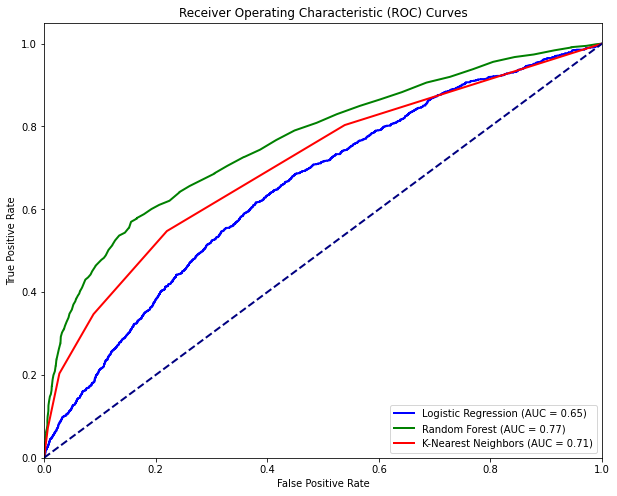

                 Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
0  Logistic Regression  0.784000   1.000000  0.000771  0.001541  0.652552
1        Random Forest  0.821667   0.647594  0.383963  0.482091  0.765032
2  K-Nearest Neighbors  0.789333   0.519031  0.346955  0.415896  0.709843


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
df

# Prepare the data
X = df.drop(['default.payment.next.month', 'ID'], axis=1)
y = df['default.payment.next.month']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=0),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

# Dictionary to hold performance metrics
model_performance = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': [], 'ROC AUC': []}

# Plot ROC curve setup
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red']
lw = 2

# Loop through models to train, predict, and calculate metrics
for i, (name, model) in enumerate(models.items()):
    if name == 'K-Nearest Neighbors':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_score = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_score = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = auc(*roc_curve(y_test, y_score)[:2])

    # Store metrics
    model_performance['Model'].append(name)
    model_performance['Accuracy'].append(accuracy)
    model_performance['Precision'].append(precision)
    model_performance['Recall'].append(recall)
    model_performance['F1-Score'].append(f1)
    model_performance['ROC AUC'].append(roc_auc)

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_score)
    plt.plot(fpr, tpr, color=colors[i], lw=lw, label=f'{name} (AUC = {roc_auc:.2f})')

# Finalize ROC plot
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

# Display performance metrics
performance_df = pd.DataFrame(model_performance)
print(performance_df)


load data in 2.2 seconds, logistic in 0.1 seconds, random forest in 4.7 seconds, knn in 11.2 seconds, all in one code+graph in 13.3 seconds

Data Loading (2.2 seconds): The time to load data depends on the file size, the format of the data, and the I/O speed of the system. Loading data is typically I/O bound rather than CPU bound, which means it's limited by how quickly the system can read the file from disk.

Logistic Regression Training (0.1 seconds): Logistic Regression is relatively fast because it relies on solving a convex optimization problem that often converges quickly, especially if the dataset is not too large or complex. It is computationally less intensive compared to more complex models like Random Forest or k-NN.

Random Forest Training (4.7 seconds): Random Forest is more computationally expensive due to the need to train multiple decision trees. The complexity increases with the number of trees (n_estimators) and the depth of each tree. It's also more memory-intensive, as each tree is stored in memory.

k-Nearest Neighbors Training (11.2 seconds): k-NN is inherently slow in the prediction phase rather than the training phase, especially with large datasets. This is because k-NN requires computing the distance between the test instance and every instance in the training set to find the k-nearest neighbors. However, the time mentioned might also include some preprocessing step like scaling, which is essential for k-NN.

All in One Code + Graph (13.3 seconds): This step involves not only training all models but also predicting with them and then generating ROC curves for each. The time taken is the cumulative time of model training, prediction, and the additional overhead of plotting the graphs.



Gauging Efficiency and Resource Consumption(to be explored but not done this time)
Profiling: Use profiling tools to measure the time and memory usage of each part of the code. Python's built-in cProfile module can help identify bottlenecks in execution time, while memory-profiler can track memory usage.

Time Measurements: Use Python's time module to measure execution times of specific code blocks. This can help compare the efficiency of different models directly.

Complexity Analysis: Understand the theoretical computational complexity of the algorithms used. For instance, the training time for Random Forest is O(N*log(N)MT) where N is the number of samples, M is the number of features, and T is the number of trees.

Resource Monitoring Tools: Use system monitoring tools (like Windows Task Manager, macOS Activity Monitor, or htop on Linux) to observe CPU and memory usage during the execution of the code.

Improving efficiency might involve algorithm optimization, parameter tuning (e.g., reducing the number of estimators in Random Forest, limiting the depth of trees, or adjusting the number of neighbors in k-NN), feature selection to reduce the dimensionality of the data, or using more efficient implementations (e.g., utilizing libraries that leverage parallel processing capabilities of the CPU or GPU).

Show all results, including model stats and run time

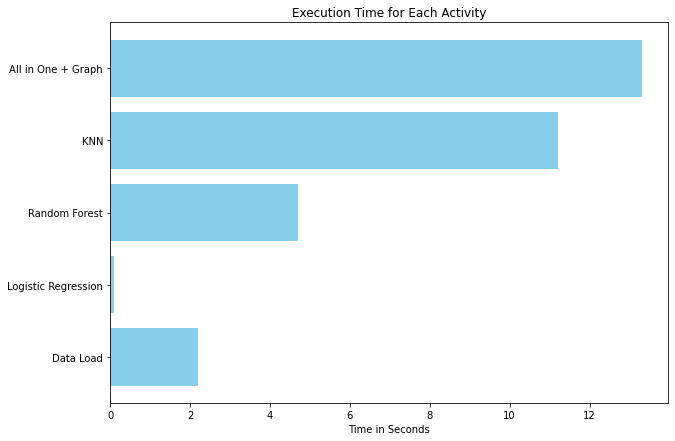

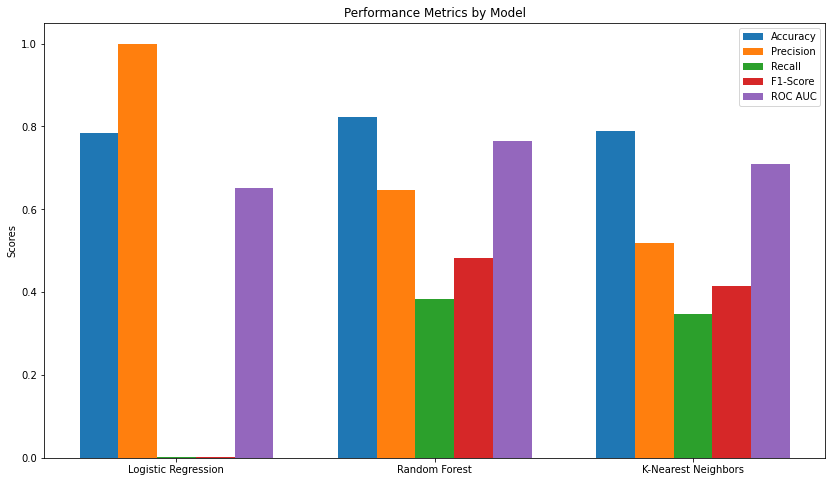

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Execution times in seconds
activities = ['Data Load', 'Logistic Regression', 'Random Forest', 'KNN', 'All in One + Graph']
times = [2.2, 0.1, 4.7, 11.2, 13.3]

# Performance Metrics for each model
models = ['Logistic Regression', 'Random Forest', 'K-Nearest Neighbors']
accuracy = [0.784, 0.821667, 0.789333]
precision = [1.000000, 0.647594, 0.519031]
recall = [0.000771, 0.383963, 0.346955]
f1_score = [0.001541, 0.482091, 0.415896]
roc_auc = [0.652552, 0.765032, 0.709843]

# Plot execution times
plt.figure(figsize=(10, 7))
plt.barh(activities, times, color='skyblue')
plt.xlabel('Time in Seconds')
plt.title('Execution Time for Each Activity')
plt.show()

# Plot performance metrics
x = np.arange(len(models))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width*2, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - width, precision, width, label='Precision')
rects3 = ax.bar(x, recall, width, label='Recall')
rects4 = ax.bar(x + width, f1_score, width, label='F1-Score')
rects5 = ax.bar(x + width*2, roc_auc, width, label='ROC AUC')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics by Model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.show()


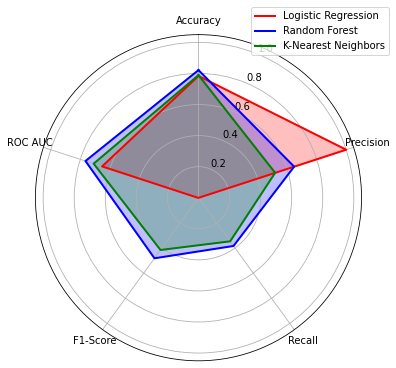

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']
values_logistic = np.array([0.784, 1.000000, 0.000771, 0.001541, 0.652552])
values_random_forest = np.array([0.821667, 0.647594, 0.383963, 0.482091, 0.765032])
values_knn = np.array([0.789333, 0.519031, 0.346955, 0.415896, 0.709843])

# Number of variables we're plotting.
num_vars = len(metrics)

# Split the circle into even parts and save the angles
# where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The radar chart needs to be a closed circle, so need to "complete the loop"
# and append the start value to the end.
values_logistic = np.concatenate((values_logistic,[values_logistic[0]]))
values_random_forest = np.concatenate((values_random_forest,[values_random_forest[0]]))
values_knn = np.concatenate((values_knn,[values_knn[0]]))
angles += angles[:1]

# Draw the outline of the data.
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values_logistic, color='red', alpha=0.25)
ax.fill(angles, values_random_forest, color='blue', alpha=0.25)
ax.fill(angles, values_knn, color='green', alpha=0.25)

# Add the lines over the filled areas.
ax.plot(angles, values_logistic, color='red', linewidth=2, label='Logistic Regression')
ax.plot(angles, values_random_forest, color='blue', linewidth=2, label='Random Forest')
ax.plot(angles, values_knn, color='green', linewidth=2, label='K-Nearest Neighbors')

# Improve the layout.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable and add labels.
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)

# Add a legend.
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()
